# Trabalho - Algoritmo A*
- Inteligência Artificial - Análise e Desenvolvimento de Sistemas - 6º Semestre.
- **Professor**: Leonardo Raiz
- **Aluno**: João Victor Carrijo Pereira

## Objetivos
- Entender os princípios do algoritmo A* e como ele difere de outros algoritmos de pesquisa.
- Implementar o algoritmo A* em Python.
- Aplicar o algoritmo a um cenário ou problema do mundo real.
- Analisar a eficácia e eficiência de sua implementação.

## Implementação do Algoritmo

- Abaixo, utilizaremos o A* para calcular o melhor trajeto entre duas cidades, sendo elas Franca (Ponto A/Origem) e São Paulo (Ponto B/Destino).

In [35]:
# Importação das bibliotecas
import networkx as nx # Biblioteca para manipulação de grafos
import matplotlib.pyplot as plt # Biblioteca para visualização
import math # Biblioteca matemática

In [36]:
# Criação do mapa de cidades (nós) e suas conexões (arestas)
cidades = {
  'Franca': (10, 100),
  'Ribeirão Preto': (50, 80),
  'Araraquara': (40, 60),
  'Pirassununga': (60, 50),
  'São Carlos': (50, 40),
  'Limeira': (70, 45),
  'Campinas': (80, 20),
  'Jundiaí': (95, 25),
  'Itatiba': (80, 5),
  'São Paulo': (100, 0)
}

# Instancia do grafo
graph = nx.Graph()

# Adicionando nós (cidades) ao grafo
for cidade, coords in cidades.items():
  graph.add_node(cidade, pos=coords)

# Adicionando arestas (conexões entre as cidades)
#  Arestas do caminho principal
graph.add_edge('Franca', 'Ribeirão Preto', weight=90)
graph.add_edge('Ribeirão Preto', 'São Carlos', weight=100)
graph.add_edge('São Carlos', 'Campinas', weight=115)
graph.add_edge('Campinas', 'São Paulo', weight=95)

#  Arestas de caminhos alternativos
graph.add_edge('Franca', 'Araraquara', weight=150)
graph.add_edge('Araraquara', 'Campinas', weight=160)
graph.add_edge('Ribeirão Preto', 'Pirassununga', weight=120)
graph.add_edge('Pirassununga', 'Limeira', weight=60)
graph.add_edge('Limeira', 'Jundiaí', weight=100)
graph.add_edge('Campinas', 'Jundiaí', weight=45)
graph.add_edge('Campinas', 'Itatiba', weight=30)
graph.add_edge('Itatiba', 'Jundiaí', weight=40)
graph.add_edge('Jundiaí', 'São Paulo', weight=60)

### Função Heurítica e busca com A*

In [ ]:
# Implementar a função heurística (usando distância euclidiana)
def heuristic_distance(ponto_a, ponto_b):
    # Obtém as coordenadas dos nós a partir do grafo
    (x1, y1) = graph.nodes[ponto_a]['pos']
    (x2, y2) = graph.nodes[ponto_b]['pos']
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)


# Implementar o algoritmo A*
def astar_path(graph, inicio, objetivo):
    # Inicializa as estruturas de dados
    lista_aberta = [(0, inicio)]  # (custo total, nó)

    # Dicionário para rastrear o caminho mais eficiente
    veio_de = {}

    custo_atual = {node: float('inf') for node in graph.nodes} # custo_atual equivale a g(n) na formula do A* - f(n) = g(n) + h(n)
    custo_atual[inicio] = 0

    custo_total = {node: float('inf') for node in graph.nodes} # custo_total equivale a f(n) na formula do A* - f(n) = g(n) + h(n)
    custo_total[inicio] = heuristic_distance(inicio, objetivo)

    while lista_aberta:

        lista_aberta.sort()  # Ordena a lista_aberta pelo custo total
        custo, no_atual = lista_aberta.pop(0)  # Nó com o menor custo total

        if no_atual == objetivo:
            # Reconstroi o caminho
            caminho = []
            while no_atual in veio_de:
                caminho.append(no_atual)
                no_atual = veio_de[no_atual]
            caminho.append(inicio)
            caminho.reverse()
            return caminho
        
        # Explora os vizinhos do nó atual
        for vizinho in graph.neighbors(no_atual):
            # Custo do caminho da origem até este vizinho
            custo_tentativo = custo_atual[no_atual] + graph[no_atual][vizinho]['weight']

            if custo_tentativo < custo_atual[vizinho]:
                # Se a condicional acima é verdade, então este é um caminho melhor para o vizinho.
                #   Atualiza o caminho e os custos.
                veio_de[vizinho] = no_atual
                custo_atual[vizinho] = custo_tentativo
                custo_total[vizinho] = custo_tentativo + heuristic_distance(vizinho, objetivo)
                
                # Se o vizinho ainda não está na lista_aberta, adiciona ele
                if (custo_total[vizinho], vizinho) not in lista_aberta:
                    lista_aberta.append((custo_total[vizinho], vizinho))

    return None # Não há caminho encontrado

### Efetuação e visualização da busca

Caminho encontrado: Franca -> Ribeirão Preto -> São Carlos -> Campinas -> São Paulo
Custo total do caminho: 400


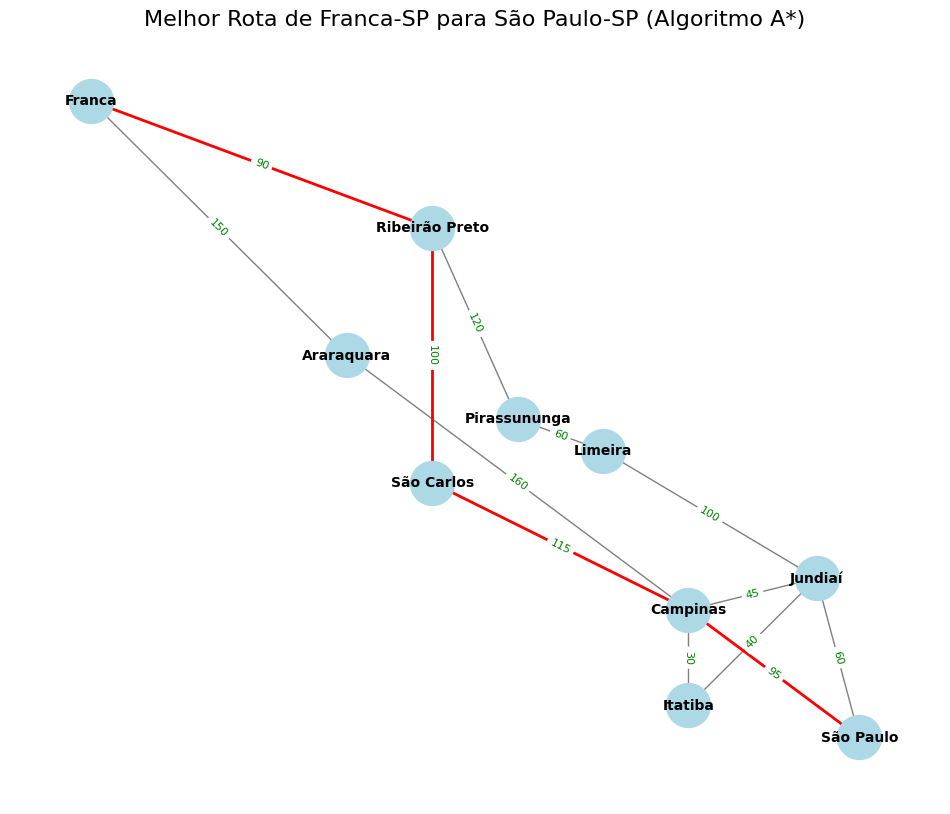

In [ ]:
origem = 'Franca'
destino = 'São Paulo'

caminho_encontrado = astar_path(graph, origem, destino)

if caminho_encontrado:
  print("Caminho encontrado:", " -> ".join(caminho_encontrado))
  
  # Calcular o custo total do caminho
  custo_total = 0
  
  for i in range(len(caminho_encontrado) - 1):
    custo_total += graph[caminho_encontrado[i]][caminho_encontrado[i+1]]['weight']
  
  print("Custo total do caminho:", custo_total)

  # Visualização do grafo e do caminho
  pos = nx.get_node_attributes(graph, 'pos')

  plt.figure(figsize=(12, 10))

  # Desenha os nós
  nx.draw_networkx_nodes(graph, pos, node_size=1000, node_color='lightblue')
  
  # Adiciona rótulos aos nós
  nx.draw_networkx_labels(graph, pos, font_size=10, font_weight='bold')

  # Desenha as arestas
  nx.draw_networkx_edges(graph, pos, edge_color='gray', width=1)

  # Destacar o caminho encontrado
  caminho_arestas = list(zip(caminho_encontrado, caminho_encontrado[1:]))
  nx.draw_networkx_edges(graph, pos, edgelist=caminho_arestas, edge_color='red', width=2)
  
  # Adicionar rótulos de custo nas arestas
  edge_labels = nx.get_edge_attributes(graph, 'weight')
  nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='green', font_size=8)

  plt.title('Melhor Rota de Franca-SP para São Paulo-SP (Algoritmo A*)', fontsize=16)
  plt.axis('off') # Remove os eixos
  plt.show()
else:
  print("Não foi possível encontrar um caminho entre a origem e o destino.")